# 0. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from sklearn.cluster import KMeans

# 1. K-mean Clustering

We have obtained the stats for all the players of La Liga in the season of 2018-19 in order to cluster them based on performance. We will use the K-mean algorithm in order to do so.

### 1.1 All Players Visualization

Let's first visualize some statistics to understand and interpret the data:

In [2]:
#We read the goals table
goals = pd.read_csv('datacsv/goal.csv')
player_sts = pd.read_csv('datacsv/player_stats.csv')
player_sts["goals_scored"] = 0
for goal_index, goal_row in goals.iterrows():
    pindex = player_sts.loc[player_sts['player_name'] == goal_row.player_name].index
    player_sts.at[pindex[0],'goals_scored'] +=1

fig = px.scatter(player_sts,x="Assists",y="goals_scored",title="Goals Vs Assists")
fig.show()

Let's put some names to this distribution of players and also visualize the goals and assists distribution:

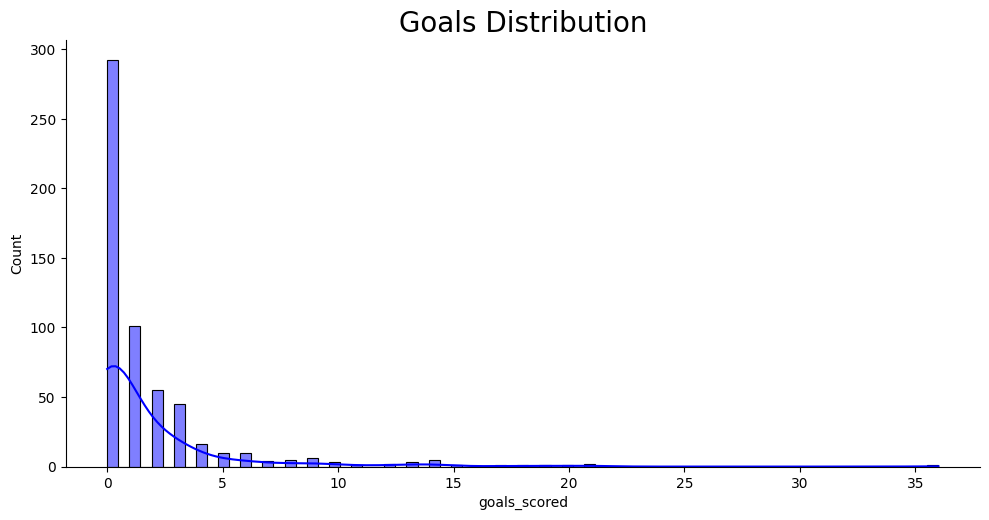

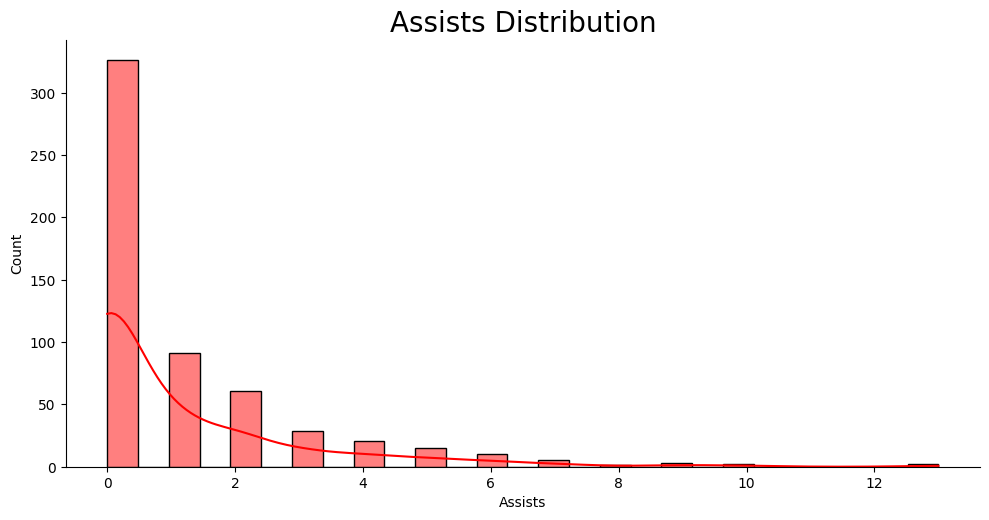

In [3]:
fig = px.scatter(player_sts,x="Assists",y="goals_scored",color="player_name",text="player_name",title="Goals Vs Assists")
fig.update_traces(textposition='top center')
fig.show()

_ = sns.displot(player_sts['goals_scored'],  kind= "hist", color = 'blue', kde = True, aspect=2,)
_ = plt.title('Goals Distribution', fontsize = 20)

_ = sns.displot(player_sts['Assists'], kind = "hist", color = 'red', kde = True, aspect=2)
_ = plt.title('Assists Distribution', fontsize = 20)

We can interpret from this that most of the players that were in La Liga this season either didn't score a goal or didn't score an assist. It can also be seen that some players, such as Lionel Messi for example exceed in goals or Luis Suárez in assists, and stand out from the rest of the league. 

Knowing this, it has much more interest clustering the top 50 players across all european leagues.

### 1.2 Top 50 Players Visualization

In [4]:
## We read the values of the matches to compute the instances and attributes:
top50 = pd.read_csv('datacsv/top50.csv')
print('Number of instances = %d' % (top50.shape[0]))
print('Number of attributes = %d' % (top50.shape[1]))

## We compute the missing values:
print('Number of missing values:')
for col in top50.columns:
    print('\t%s: %d' % (col, top50[col].isna().sum()))

## We delete the rows with missing values:
print('Number of rows in original data = %d' % (top50.shape[0]))
top50 = top50.dropna()
print('Number of rows after discarding missing values = %d' % (top50.shape[0]))

Number of instances = 50
Number of attributes = 15
Number of missing values:
	R: 0
	Player: 0
	Name: 0
	Club: 0
	Age: 0
	Main position: 0
	Apps: 0
	Mins: 0
	Goals: 0
	Assists: 0
	Shot per Game: 0
	Key Pass: 0
	Dribble: 0
	Fouled: 0
	Rating: 0
Number of rows in original data = 50
Number of rows after discarding missing values = 50


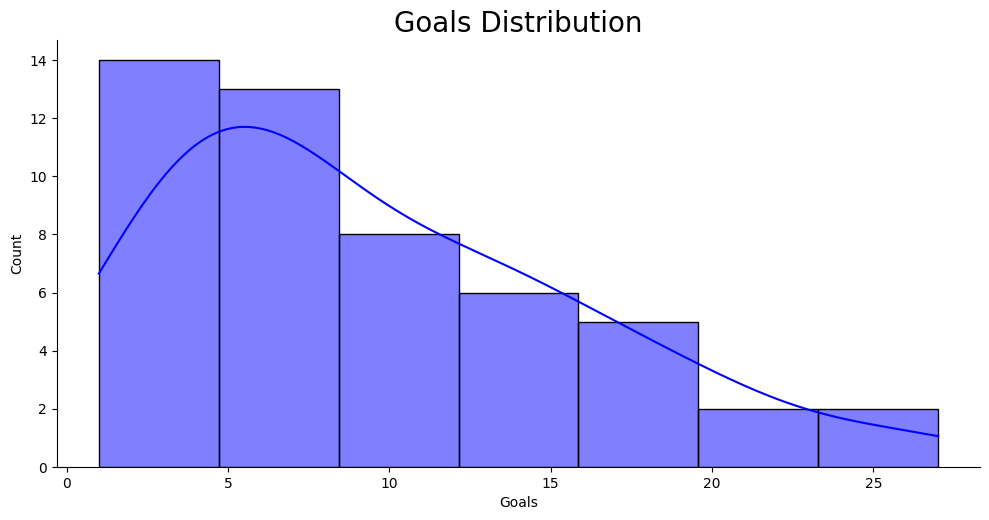

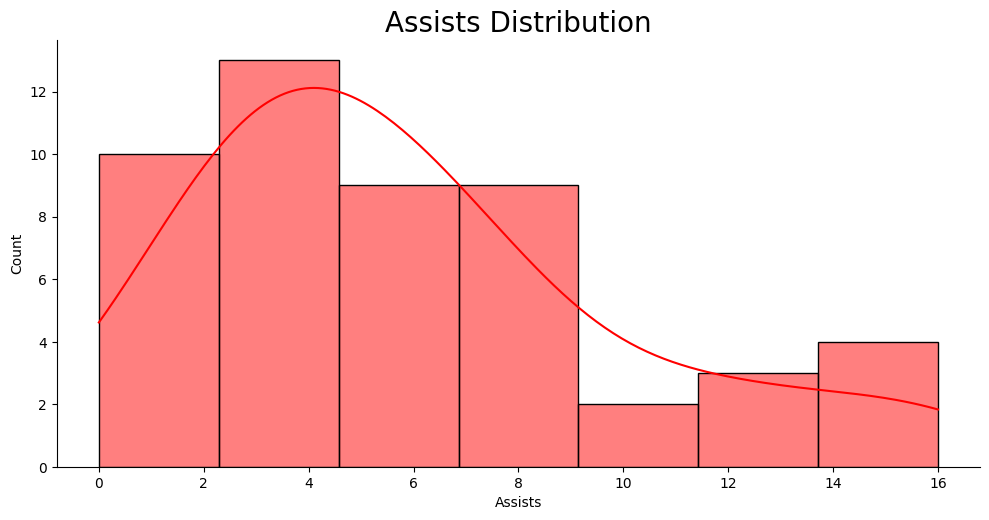

In [5]:
fig = px.scatter(top50,x="Assists",y="Goals",color="Player",text="Name",title="Goals Vs Assists")
fig.update_traces(textposition='top center')
fig.show()

_ = sns.displot(top50['Goals'],  kind= "hist", color = 'blue', kde = True, aspect=2,)
_ = plt.title('Goals Distribution', fontsize = 20)

_ = sns.displot(top50['Assists'], kind = "hist", color = 'red', kde = True, aspect=2)
_ = plt.title('Assists Distribution', fontsize = 20)

We are able to observe 4 regions of Players: 
1. those with few assists/goals (e.g: Mikel Merino)
2. those with lots of assists/goals (e.g: Lionel Messi)
3. those with lots of assists but few goals (e.g: Thomas Muller)
4. those with lots of goals but few assists (e.g: Robert Lewandowski)

If we represent the distribution of Goals we obtain that most players have between 0 and 7-8 goals, being 5 the highest count of goals across all Players.
On the other hand, representing the distribution of Assists we obtain that most players have between 2 and 5 assists, being 3 the highest count of assists across all Players.

Let's plot now the numbers of dribbles/key passes and shots per game for this group of players to further understand each players roles:

In [6]:
fig = px.scatter_3d(top50, x="Dribble",y="Key Pass",z="Shot per Game",color="Player",text="Name",
                    title="Dribbling per Game VS Key Pass per Game VS Shot per Game")
fig.update_traces(textposition='top center')
fig.show()

From this 3D plot, we can observe some key aspects:

1. Neymar and Messi exceed as offensive players with most dribbles per game, and a high number of key passes and shots made.
2. Ronaldo tops the chart in number of shots made per game, being more of a striker.
3. Kevin De Bruyne has the highest amount of key passes per game out of the chart.

### 1.3 K-mean Clustering Players on the basis of Goals and Assists

Let's cluster the Players based on the numbers of Goals and Assists. To obtain the number of clusters we should use we can use the Elbow Method which links the WCSS (Within-Cluster Sum of Squares) to the Number of Clusters for the K-mean method of clustering.

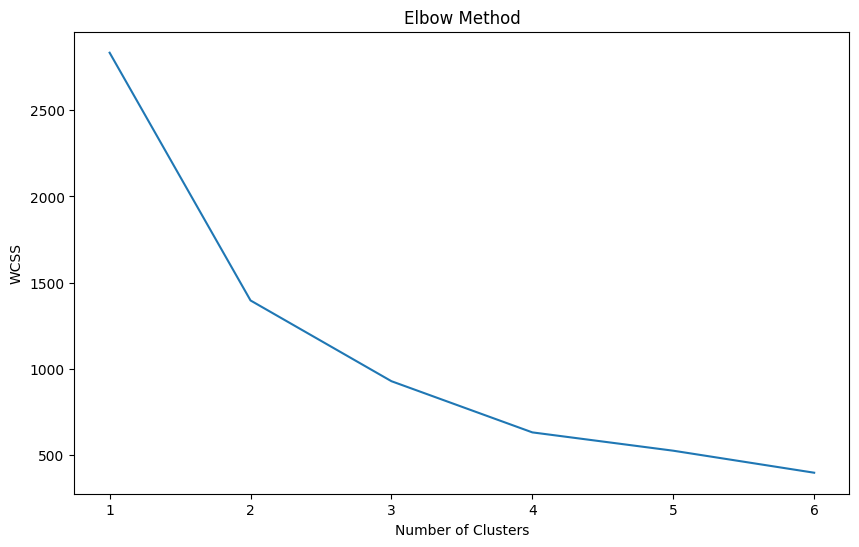

In [7]:
X= top50.iloc[:, [8,9]].values ## grab only the Goals and Assists
wcss=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters= i, init='k-means++',random_state=0, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    
fig=plt.figure(figsize=(10,6)) 
plt.plot(range(1,7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

Let's try applying 2 and 4 clusters for our task and see how well the data is separated:

### 1.4 K-Mean of 2 Clusters 

In [8]:
kmeans2 = KMeans(n_clusters=2 , init='k-means++', random_state=0)
y_kmeans= kmeans2.fit_predict(X)

c:\Users\danni\.virtualenvs\notebookdata-nHLWBBIB\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



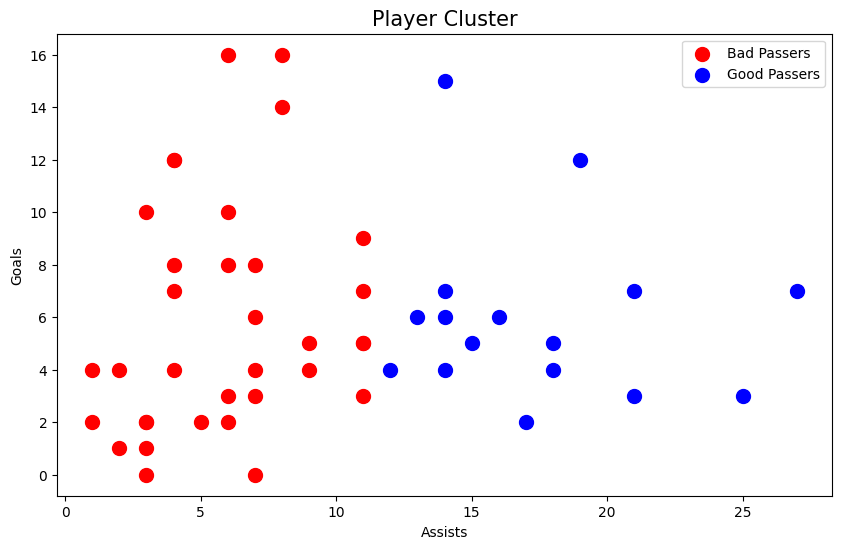

In [9]:
fig=plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='Bad Passers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='Good Passers')
plt.title('Player Cluster', fontsize = 15)
plt.xlabel('Assists')
plt.ylabel('Goals')
_ = plt.legend()

We can see that the K-mean method separates the Players in two clusters: those above 11-12 assists. With this approach we can't really cluster the Players in different categories apart from: good passers and bad passers. Let's see with 4 clusters:

### 1.5 K-Mean of 4 Clusters

In [10]:
kmeans4 = KMeans(n_clusters=4 , init='k-means++', random_state=0)
y_kmeans= kmeans4.fit_predict(X)

c:\Users\danni\.virtualenvs\notebookdata-nHLWBBIB\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



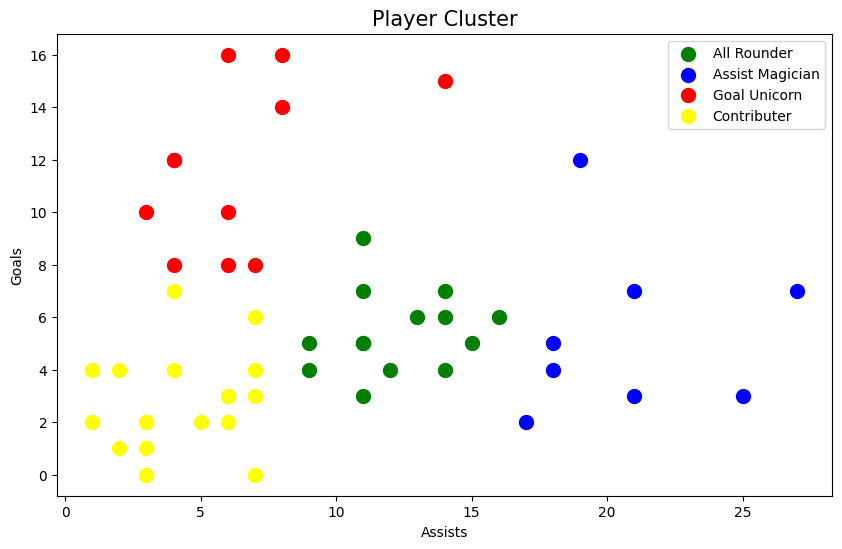

In [11]:
fig=plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label='All Rounder')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Assist Magician')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Goal Unicorn')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Contributer')
plt.title('Player Cluster', fontsize = 15)
plt.xlabel('Assists')
plt.ylabel('Goals')
_ = plt.legend()

This time, using a 4 cluster K-mean, we see we have some distinct groups. They have been categorised as:

1. Contributer: those players with a lower impact with few assists/goals.
2. All Rounder: those players with an average contribution through goals and assists.
3. Assist Magician: those players with more contribution through assists than goals.
4. Goal Unicorn: those players with more contribution through goals than assists.

With this clustering, it is interesting to see in which category falls each player:

In [12]:
labels = kmeans4.labels_
top50["label"]=labels
top50.loc[top50['label'] == 3, 'Category'] = 'Contributer'
top50.loc[top50['label'] == 2, 'Category'] = 'Assist Magician'
top50.loc[top50['label'] == 1, 'Category'] = 'Goal Unicorn'
top50.loc[top50['label'] == 0, 'Category'] = 'All Rounder'

fig = px.scatter(top50,x="Assists",y="Goals",color="Category",text="Name",title="K-mean Clustering")
fig.update_traces(textposition='top center')
fig.show()